In [10]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
## save the book locally
if not os.path.exists('sherlock-holmes.txt'):
    text = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt').text
    with open("sherlock-holmes.txt", "w") as text_file:
        text_file.write(text)

## read in the book   
# Make sure sherlock-holmes.txt is in the current working directory
text = open('sherlock-holmes.txt','r').read()

In [13]:
stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, text)
sentences = [re.sub("\r|\n"," ",s.lower()) for s in sentences][3:]

In [16]:
df=pd.read_csv('sherlock-holmes-annotations.csv')
df['text'] = sentences
df['num_words'] = df['text'].apply(lambda x: len(x.split(" ")))

In [17]:
df.head()

,has_sherlock,has_watson,text,num_words
0,True,False,net title: the adventures of sherlock holmes...,91
1,False,False,a scandal in bohemia ii,13
2,False,False,the red-headed league iii,11
3,False,False,a case of identity iv,11
4,False,False,the boscombe valley mystery v,12


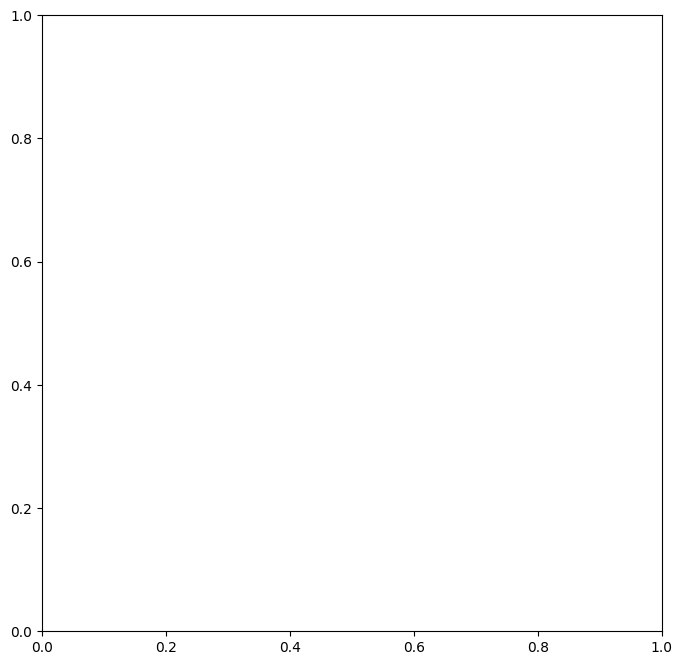

In [18]:
## make eda plot
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

In [19]:
data1 = df[df['has_sherlock']==True]
data2 = df[df['has_watson']==True]

In [21]:
data = [df[df[col]==True]['num_words'].values for col in ['has_sherlock','has_watson']]

In [22]:
pos = [1,2]
ax1.violinplot(data, pos, points=40, widths=0.5, showextrema=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x15324ec10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1536b7050>,
 'cmins': <matplotlib.collections.LineCollection at 0x1536b2ed0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1528e49d0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x1536c84d0>}

In [23]:
labels = ['Sherlock', 'Watson']
ax1.set_xticks(np.arange(1, len(labels) + 1))
ax1.set_xticklabels(labels)
ax1.set_xlim(0.25, len(labels) + 0.75)
ax1.set_xlabel('Feature')
ax1.set_ylabel('# Words')
ax1.set_title("Words per sentence")

Text(0.5, 1.0, 'Words per sentence')

In [28]:
plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# extract the data to be used in the model from the df
labels=np.zeros(df.shape[0])
labels[(df['has_sherlock']==True)] = 1
labels[(df['has_watson']==True)] = 2
df['labels'] = labels
df = df[df['labels']!=0]
X = df['text'].values
y = df['labels'].values

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
## carry out the train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
text_clf=Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',SGDClassifier(loss='hinge',penalty='l2',
            alpha=1e-3,random_state=42,
            max_iter=5,tol=None))
])
## train a model
text_clf.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [34]:
from sklearn import metrics
## evaluate the model performance
predicted=text_clf.predict(X_test)
print(metrics.classification_report(y_test,predicted,target_names=['sherlock','watson']))

              precision    recall  f1-score   support

    sherlock       0.90      0.95      0.93       176
      watson       0.78      0.64      0.70        50

    accuracy                           0.88       226
   macro avg       0.84      0.79      0.81       226
weighted avg       0.88      0.88      0.88       226



In [35]:
"""
There are numerous correct answers and if you came up with something similar to the following your are on the right track. Because customer frequency and duration are essentially proxies for revenue and because the relationship between these data and the game is direct we ask our questions with this in mind rather than revenue directly. Asking in terms of revenue directly is not wrong in this case, but a positive correlation is harder to interpret due to likely presence of confounding factors.
- Which games are most associated with sales?
- Is my new game a stronger predictor of frequency and duration than other games?
- Is my new game more strongly correlated with frequency and duration than other games?
- In a predictive model does my new game have a stronger feature importance then other games?
"""

'\nThere are numerous correct answers and if you came up with something similar to the following your are on the right track. Because customer frequency and duration are essentially proxies for revenue and because the relationship between these data and the game is direct we ask our questions with this in mind rather than revenue directly. Asking in terms of revenue directly is not wrong in this case, but a positive correlation is harder to interpret due to likely presence of confounding factors.\n- Which games are most associated with sales?\n- Is my new game a stronger predictor of frequency and duration than other games?\n- Is my new game more strongly correlated with frequency and duration than other games?\n- In a predictive model does my new game have a stronger feature importance then other games?\n'

In [ ]:
"""
In the above results output the support is the number of occurrences of each class in y_true. It follows that we have relatively unbalanced classes and we made no special accommodation for this situation. It is a major purpose of this stage to be critical and reflect on the process, the finding all the while keeping in mind the central business question.
 
Knowing that our classes are in-balanced we need to be careful about using accuracy as a metric. We will do a deeper dive into both in-balanced classes and evaluation metrics in this course. Give a sentence we do a better job predicting a sherlock context than a watson one. This is where we want to be critical and start asking questions like:
- My game in production will likely see many different sentences. Would a negative class improve my model?
- I need to compare this game to the others and relate it to revenue how do I accomplish this?
- Is developing a new game even worth the effort or is there another way to use DS to help my friend?
"""